In [560]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import json
import fidle
import math

from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from tqdm import tqdm

import warnings 
warnings.filterwarnings("ignore")

In [386]:
INPUT_DIR = './data/raw_data.csv'

In [387]:
random_state = 42
np.random.seed(random_state)

# Statistical analysis and pre-processing

In [388]:
df_spectrum = pd.read_csv(INPUT_DIR, sep = ";")
df_spectrum.head(20)

,patient_name,cell_name,cell_type,patient_state,lambda_1,lambda_2,lambda_3,lambda_4,lambda_5,lambda_6,...,lambda_991,lambda_992,lambda_993,lambda_994,lambda_995,lambda_996,lambda_997,lambda_998,lambda_999,spectre
0,P2_ULC80,P2_ULC80_M1_L1_ROI1_C1,B,malade,86.256404,84.116425,83.269485,73.725729,69.172432,58.695397,...,345.330540,343.913899,340.570137,336.092245,329.088472,324.055107,314.110388,319.853392,335.922163,3.0
1,P2_ULC80,P2_ULC80_M1_L1_ROI1_C1,B,malade,72.367814,70.946072,73.946121,69.342146,66.510280,51.961781,...,329.497317,330.293120,334.239066,336.958602,332.810752,337.041213,329.390541,317.220241,289.615842,2.0
2,P2_ULC80,P2_ULC80_M1_L1_ROI1_C1,B,malade,36.107124,50.509171,61.251275,60.634079,59.005082,43.374480,...,349.773008,362.963878,377.543505,369.898047,347.525042,324.241500,304.862554,313.958545,356.180451,1.0
3,P2_ULC80,P2_ULC80_M1_L1_ROI1_C2,B,malade,75.073652,57.880571,53.339291,47.543917,51.896103,40.910901,...,316.498420,323.193044,321.317859,310.282294,326.497336,339.002563,345.054206,372.404114,414.603390,2.0
4,P2_ULC80,P2_ULC80_M1_L1_ROI1_C2,B,malade,51.591270,54.161436,63.649577,58.364222,61.095665,47.811723,...,324.027328,320.147621,318.339477,310.159782,313.315257,333.873758,339.270424,352.541981,351.914705,1.0
5,P2_ULC80,P2_ULC80_M1_L1_ROI1_C2,B,malade,90.665864,69.450146,61.542858,56.898631,59.307446,44.187235,...,335.898065,341.749994,339.987225,337.086019,324.008430,321.904139,310.944530,314.970685,326.042277,3.0
6,P2_ULC80,P2_ULC80_M1_L1_ROI1_C3,B,malade,76.806990,63.758196,59.234512,52.092125,52.131473,62.413284,...,327.729733,315.710343,320.022062,335.608277,333.839189,336.388360,335.511086,333.007342,328.293681,2.0
7,P2_ULC80,P2_ULC80_M1_L1_ROI1_C3,B,malade,68.128555,74.501354,73.706639,63.659678,53.066884,36.711672,...,329.770690,341.272390,331.934981,323.305150,322.222483,319.157929,317.612928,322.685184,339.488540,1.0
8,P2_ULC80,P2_ULC80_M1_L1_ROI1_C3,B,malade,28.653430,55.187479,72.535138,78.108593,77.646574,78.745405,...,346.774466,350.157161,334.692302,333.060901,316.019307,323.507616,332.450905,332.546987,322.442181,3.0
9,P2_ULC80,P2_ULC80_M1_L1_ROI1_C4,B,malade,67.767125,52.826916,55.736389,59.757870,68.521903,61.671437,...,309.847980,312.615938,316.542496,325.770561,330.056774,346.517926,362.024558,362.629405,349.969460,3.0


In [389]:
df_by_cell = df_spectrum[["patient_name", "cell_name", "cell_type", "patient_state"]].groupby(['patient_name', 'cell_name']).first().reset_index()
df_by_cell.head(40)

,patient_name,cell_name,cell_type,patient_state
0,P1_ULC100,P1_ULC100_M1_L1_ROI1_C1,TNK,sain
1,P1_ULC100,P1_ULC100_M1_L1_ROI1_C11,TNK,sain
2,P1_ULC100,P1_ULC100_M1_L1_ROI1_C2,TNK,sain
3,P1_ULC100,P1_ULC100_M1_L1_ROI1_C3,TNK,sain
4,P1_ULC100,P1_ULC100_M1_L1_ROI1_C4,TNK,sain
5,P1_ULC100,P1_ULC100_M1_L1_ROI1_C5,TNK,sain
6,P1_ULC100,P1_ULC100_M1_L1_ROI1_C6,TNK,sain
7,P1_ULC100,P1_ULC100_M1_L1_ROI1_C7,TNK,sain
8,P1_ULC100,P1_ULC100_M1_L1_ROI1_C9,TNK,sain
9,P1_ULC100,P1_ULC100_M1_L1_ROI2_C10,TNK,sain


This dataframe has only one line for each cell.

In [390]:
list_cell = list(np.unique(df_by_cell["cell_name"]))
dict_cell = {}
for element in list_cell:
    dict_cell[element] = len(df_by_cell[df_by_cell["cell_name"] == element])

In [391]:
df_wo_duplicate = df_spectrum.drop_duplicates(subset=["cell_name", "cell_type"])
print(["A cell can have different cell types", "Each cell has an unique cell type"][len(df_wo_duplicate) == len(list_cell)])

Each cell has an unique cell type


Here , we verifed that each cell in the original dataframe had only one cell type.

In [392]:
patient = list(np.unique(df_by_cell["patient_name"]))
nb_B = np.array([len(df_by_cell[(df_by_cell["patient_name"] == i) & (df_by_cell["cell_type"]== "B")]) for i in patient])
nb_TNK = np.array([len(df_by_cell[(df_by_cell["patient_name"] == i) & (df_by_cell["cell_type"]== "TNK")]) for i in patient])
patient_state = [ df_by_cell[df_by_cell["patient_name"]== i]["patient_state"].values.tolist()[0] for i in patient ]
frac_B = nb_B/(nb_B + nb_TNK)

df_by_patient = pd.DataFrame({"patient":patient , "patient_state":patient_state , "frac_B":frac_B  })
df_by_patient

,patient,patient_state,frac_B
0,P1_ULC100,sain,0.032787
1,P1_ULC101,sain,0.078125
2,P1_ULC103,sain,0.000000
3,P1_ULC106,sain,0.000000
4,P1_ULC127,sain,0.208333
5,P1_ULC133,sain,0.084615
6,P1_ULC137,sain,0.105263
7,P1_ULC138,sain,0.298013
8,P1_ULC144,sain,0.076923
9,P1_ULC147,sain,0.204380


This dataframe has only one line for each patient.

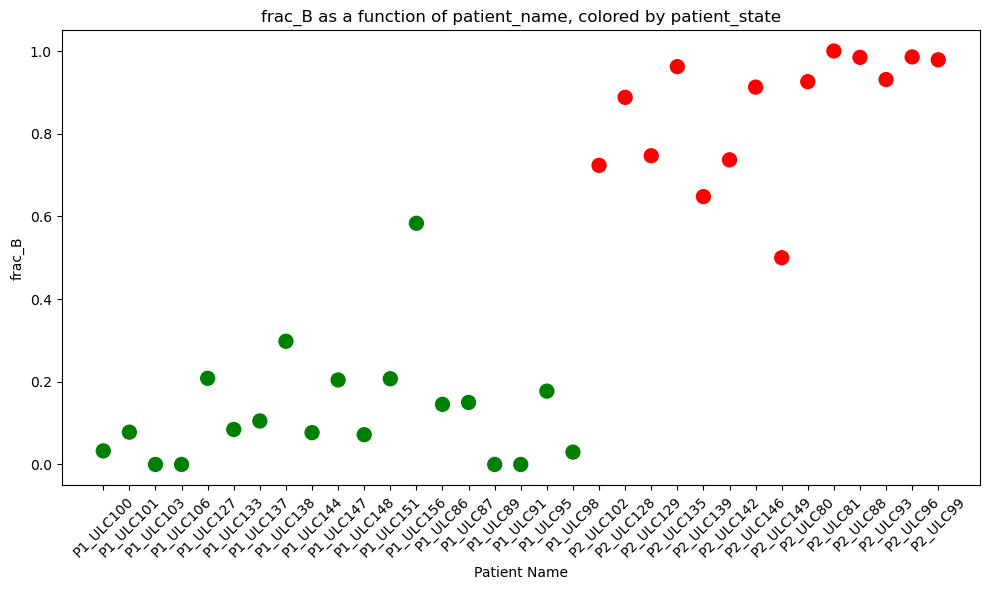

In [599]:
def map_patient_state_to_color(state):
    if state == "malade":
        return "red"
    elif state == "sain":
        return "green"
    else:
        return "blue"  

plt.figure(figsize=(10, 6))
plt.scatter(df_by_patient["patient"], df_by_patient["frac_B"], c=df_by_patient["patient_state"].apply(map_patient_state_to_color), s=100)
plt.xlabel("Patient Name")
plt.ylabel("frac_B")
plt.title("frac_B as a function of patient_name, colored by patient_state")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

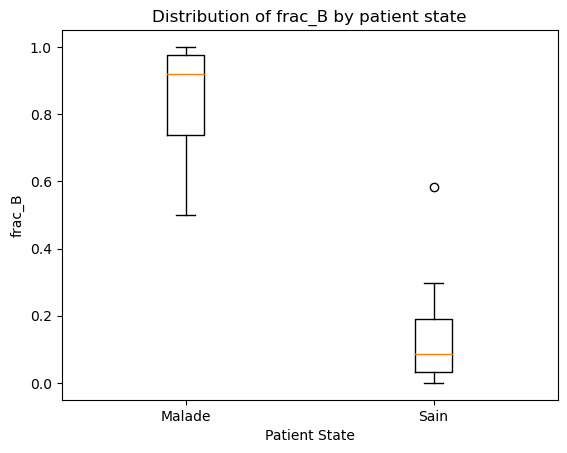

In [600]:
df_sick = df_by_patient[df_by_patient["patient_state"] == "malade"]["frac_B"].values.tolist()
df_healthy = df_by_patient[df_by_patient["patient_state"] == "sain"]["frac_B"].values.tolist()

fig, ax = plt.subplots()

ax.boxplot([df_sick, df_healthy], positions=[1, 2])
ax.set_xticks([1, 2])
ax.set_xticklabels(["Malade", "Sain"])
ax.set_xlabel("Patient State")
ax.set_ylabel("frac_B")
ax.set_title("Distribution of frac_B by patient state")
plt.show()

We can exclude the healthy patient with a frac_B = 0.58 . 

In [395]:
df_spectrum = df_spectrum[df_spectrum["patient_name"] != "P1_ULC156"]
df_by_cell = df_by_cell[df_by_cell["patient_name"] != "P1_ULC156"]

In [396]:
df_spectrum.describe()

,lambda_1,lambda_2,lambda_3,lambda_4,lambda_5,lambda_6,lambda_7,lambda_8,lambda_9,lambda_10,...,lambda_991,lambda_992,lambda_993,lambda_994,lambda_995,lambda_996,lambda_997,lambda_998,lambda_999,spectre
count,6984.000000,6984.000000,6984.000000,6984.000000,6984.000000,6984.000000,6984.000000,6984.000000,6984.000000,6984.000000,...,6984.000000,6984.000000,6984.000000,6984.000000,6984.000000,6984.000000,6984.000000,6984.000000,6984.000000,6984.000000
mean,59.969560,60.314790,59.757491,60.741233,63.451922,57.323533,65.462286,75.237071,91.634199,109.723113,...,329.483175,333.641183,332.501930,334.697167,336.217626,339.325238,338.999873,339.374985,340.880031,1.949026
std,19.994210,17.262230,17.927860,16.390694,13.867047,17.234920,15.620315,15.168783,14.141885,14.091686,...,28.046236,27.649131,27.959379,28.210792,29.154156,29.500471,31.666843,31.711837,36.742621,0.813203
min,-12.995530,8.440945,1.530354,5.717389,20.313871,11.445971,14.353926,30.274836,47.596634,65.010792,...,200.871285,185.342734,179.166929,181.075762,171.396883,180.273545,175.537804,189.114613,162.011435,1.000000
25%,46.678398,48.244441,47.563986,49.564404,54.272114,45.988571,54.515387,64.970722,82.026095,99.949618,...,315.287823,320.981225,319.614998,321.002176,322.425710,326.124278,323.691653,324.587914,323.298051,1.000000
50%,58.989268,59.228337,58.013144,58.784903,61.802540,55.175128,64.102414,73.717898,90.640325,109.047894,...,334.762952,339.535947,338.573758,340.928124,342.552607,346.606842,345.642541,346.179445,346.780314,2.000000
75%,71.485970,69.775780,69.636873,69.815278,70.583021,66.286946,74.227005,84.317225,100.114319,118.061472,...,348.736731,352.390802,351.392796,354.417047,357.375552,360.834486,362.604346,361.797509,365.385878,3.000000
max,154.161658,168.810197,167.825665,171.197853,160.204620,165.600060,159.633693,158.330256,158.999332,170.533498,...,406.445658,401.881794,408.206418,415.210829,414.584479,423.749905,434.973547,423.668719,445.906239,3.000000


Three ways to do it:

- Group by cell and average the spectra together.
- Do not group and determine that if a spectrum is B, then everything is B.
- Linearize each cell, multiplying the number of variables by 3.

We cannot linearize, because the cells have different numbers of spectrum. <br>
If we do not group the lines, we will have more data (because more lines) but if we have different predictions for one cell, how can we choose the cell type? <br>
So, we will group by cell, and average the spectra together.

In [397]:
df_spectrum[df_spectrum["spectre"] == 1].describe()

,lambda_1,lambda_2,lambda_3,lambda_4,lambda_5,lambda_6,lambda_7,lambda_8,lambda_9,lambda_10,...,lambda_991,lambda_992,lambda_993,lambda_994,lambda_995,lambda_996,lambda_997,lambda_998,lambda_999,spectre
count,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,...,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.000000,2496.0
mean,59.915826,60.284089,60.005837,60.810940,63.502970,57.149375,65.276638,75.180655,91.756805,110.169619,...,326.991822,331.294802,330.166080,332.259488,333.607998,336.719962,336.243475,336.587927,337.988355,1.0
std,20.573695,17.624749,18.231966,16.471730,13.928160,17.344601,15.699035,15.305432,14.383922,14.345264,...,30.449013,29.891532,30.306798,30.681649,31.721946,31.820229,34.106975,34.453431,40.284943,0.0
min,-12.995530,8.440945,9.767759,15.244046,25.348421,13.723209,14.353926,35.291862,53.952203,70.701400,...,200.871285,185.342734,179.166929,181.075762,171.396883,180.273545,175.537804,189.114613,162.011435,1.0
25%,46.017985,47.954988,47.451303,49.564406,54.355812,45.732475,54.408755,64.946828,81.884318,100.570211,...,311.131697,315.146575,312.536510,315.564469,316.858720,320.595106,319.933043,318.977276,317.860493,1.0
50%,58.959139,59.001737,58.028357,58.953096,61.802540,54.702198,63.632196,73.676788,90.678700,109.158968,...,333.675562,338.154949,337.356954,339.896441,341.598783,345.169401,345.005220,344.657430,345.477064,1.0
75%,71.631929,69.537435,69.793659,69.634329,70.966925,66.110978,74.121039,84.318699,100.531751,118.619542,...,347.890074,352.109823,351.080082,353.738720,356.456291,359.985403,361.416932,361.026178,365.310458,1.0
max,154.161658,164.379593,167.825665,171.197853,160.204620,165.600060,159.633693,157.653681,158.999332,168.455529,...,406.445658,399.658420,400.858514,407.766966,410.627976,403.250719,417.476018,418.222328,445.906239,1.0


In [398]:
df_spectrum[df_spectrum["spectre"] == 2].describe()

,lambda_1,lambda_2,lambda_3,lambda_4,lambda_5,lambda_6,lambda_7,lambda_8,lambda_9,lambda_10,...,lambda_991,lambda_992,lambda_993,lambda_994,lambda_995,lambda_996,lambda_997,lambda_998,lambda_999,spectre
count,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,...,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.0
mean,59.827172,60.363767,59.810474,60.857551,63.525853,57.553954,65.654738,75.338478,91.715339,109.712787,...,329.628179,333.744412,332.530321,334.706440,336.167786,339.323412,339.090878,339.479684,340.941847,2.0
std,19.818484,17.028206,17.754779,16.407592,14.087475,17.325390,15.735643,15.321539,14.291785,14.366257,...,27.647038,27.393901,27.517684,27.616965,28.787849,29.276501,31.422345,31.183196,35.669666,0.0
min,-10.465511,14.292136,8.967127,12.435923,25.642189,11.445971,14.353926,35.207898,47.596634,65.010792,...,209.615214,231.719114,229.484866,236.478433,232.608030,230.827564,218.023520,231.065556,206.322446,2.0
25%,47.130066,48.517232,47.859674,49.568899,54.106772,46.113347,54.506013,64.680797,81.911681,99.626159,...,315.851432,321.864281,320.063862,320.970327,322.638124,325.838923,322.883561,324.587914,323.360022,2.0
50%,58.924976,59.228337,58.015325,58.772127,61.961170,55.282168,64.169401,73.619699,90.911590,109.056366,...,334.737199,339.729734,338.622582,340.928124,342.306223,346.579972,345.932964,346.020695,346.329679,2.0
75%,71.426523,69.742495,69.544133,70.208498,70.787497,66.319160,74.664252,84.512122,100.221776,118.085054,...,348.477203,352.208021,351.145370,354.165070,357.730400,360.889653,362.614161,361.538363,364.716015,2.0
max,144.179412,168.810197,167.820824,164.336949,145.455404,158.307886,158.315223,158.330256,158.694311,170.533498,...,398.861168,401.881794,397.360471,405.264332,405.974420,405.826363,415.981666,416.412051,436.794267,2.0


In [399]:
df_spectrum[df_spectrum["spectre"] == 3].describe()

,lambda_1,lambda_2,lambda_3,lambda_4,lambda_5,lambda_6,lambda_7,lambda_8,lambda_9,lambda_10,...,lambda_991,lambda_992,lambda_993,lambda_994,lambda_995,lambda_996,lambda_997,lambda_998,lambda_999,spectre
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.0
mean,60.188461,60.296861,59.409698,60.532307,63.311266,57.273846,65.467660,75.191607,91.402169,109.213656,...,332.229880,336.264633,335.195210,337.530193,339.316063,342.365919,342.114963,342.510809,344.184929,3.0
std,19.501896,17.097141,17.761267,16.282736,13.553724,17.010860,15.404474,14.843256,13.688360,13.464180,...,25.158782,24.835022,25.222621,25.461178,25.964597,26.503611,28.545749,28.505434,33.129669,0.0
min,-2.423907,13.277043,1.530354,5.717389,20.313871,14.528515,21.378801,30.274836,50.021004,71.579186,...,227.594911,234.696138,233.694226,234.384863,232.575739,228.012107,226.748909,238.423835,189.361245,3.0
25%,46.789022,48.231718,47.213392,49.523183,54.469330,45.989304,54.619936,65.315057,82.026095,99.646254,...,319.800057,325.337158,324.462235,326.336497,327.553396,330.977341,327.156878,328.751279,328.593906,3.0
50%,59.106058,59.173120,57.911432,58.491679,61.802540,55.175128,64.431480,73.838104,90.338114,108.571220,...,336.354112,340.577848,339.690308,342.121046,343.628404,347.919853,346.521338,347.877453,348.189111,3.0
75%,71.396467,69.967087,69.389155,69.440032,70.071517,66.090636,74.011324,83.929124,99.351039,117.525284,...,349.806645,353.017703,352.332442,355.323505,357.968963,361.133353,363.495616,362.909658,365.707440,3.0
max,147.750479,165.380766,167.329946,168.477137,156.425778,158.168386,150.346599,154.617254,157.002381,166.714753,...,401.889451,400.745916,408.206418,415.210829,414.584479,423.749905,434.973547,423.668719,436.786448,3.0


In [400]:
ind_healthy = "P1_ULC89"
ind_sick = "P2_ULC80"

df_ind_healthy = df_spectrum[df_spectrum["patient_name"] == ind_healthy].reset_index()
df_ind_sick = df_spectrum[df_spectrum["patient_name"] == ind_sick].reset_index()

i = 1
j = 1

cell_name_TNK = f"{ind_healthy}_M1_L1_ROI1_C{i}"
cell_name_B = f"{ind_sick}_M1_L1_ROI1_C{j}"

while (df_by_cell[df_by_cell["cell_name"] == cell_name_TNK]["cell_type"] != "TNK").values[0] or len(df_ind_healthy[df_ind_healthy["cell_name"] == cell_name_TNK]) != 3:
    i += 1
    cell_name_TNK = f"{ind_healthy}_M1_L1_ROI1_C{i}"

while (df_by_cell[df_by_cell["cell_name"] == cell_name_B]["cell_type"] != "B").values[0] or len(df_ind_sick[df_ind_sick["cell_name"] == cell_name_B]) != 3:
    j += 1
    cell_name_B = f"{ind_sick}_M1_L1_ROI1_C{j}"

df_ind_healthy = df_ind_healthy[df_ind_healthy["cell_name"] == cell_name_TNK].loc[:, "lambda_1":"spectre"]
df_ind_sick = df_ind_sick[df_ind_sick["cell_name"] == cell_name_B].loc[:, "lambda_1":"spectre"]
df_ind_sick

,lambda_1,lambda_2,lambda_3,lambda_4,lambda_5,lambda_6,lambda_7,lambda_8,lambda_9,lambda_10,...,lambda_991,lambda_992,lambda_993,lambda_994,lambda_995,lambda_996,lambda_997,lambda_998,lambda_999,spectre
0,86.256404,84.116425,83.269485,73.725729,69.172432,58.695397,52.119610,56.263689,86.478892,116.868995,...,345.330540,343.913899,340.570137,336.092245,329.088472,324.055107,314.110388,319.853392,335.922163,3.0
1,72.367814,70.946072,73.946121,69.342146,66.510280,51.961781,58.639653,67.710887,95.071101,117.132538,...,329.497317,330.293120,334.239066,336.958602,332.810752,337.041213,329.390541,317.220241,289.615842,2.0
2,36.107124,50.509171,61.251275,60.634079,59.005082,43.374480,61.320470,74.500701,98.858167,119.955467,...,349.773008,362.963878,377.543505,369.898047,347.525042,324.241500,304.862554,313.958545,356.180451,1.0


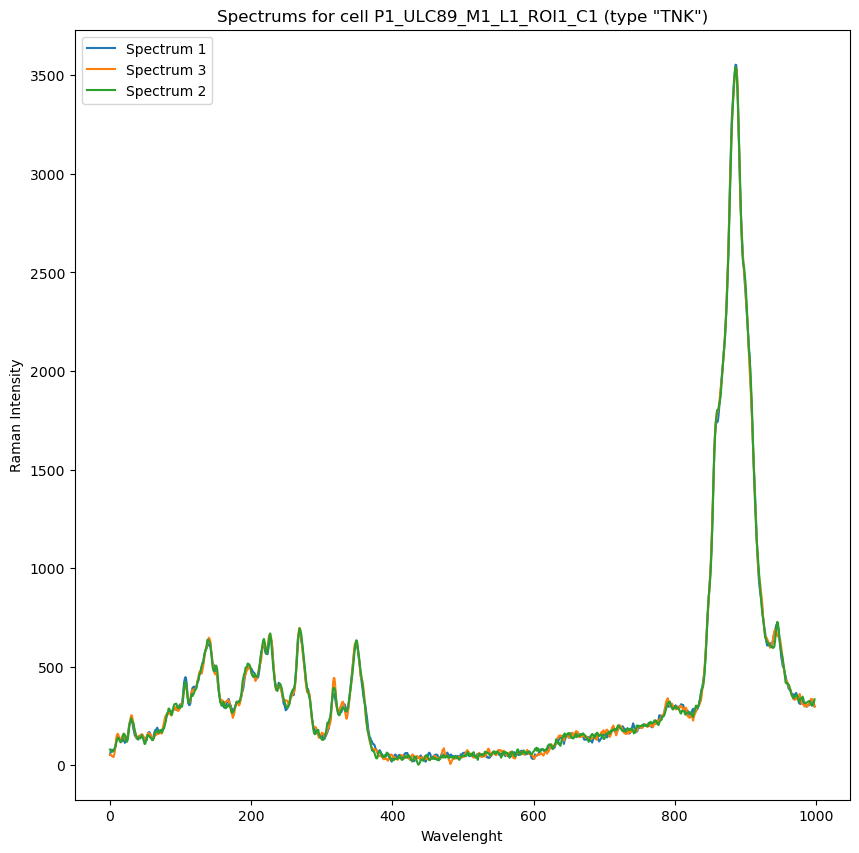

In [401]:
plt.figure(figsize=(10, 10))
plt.plot(list(range(999)), df_ind_healthy.drop(columns=["spectre"]).iloc[0], label= f'Spectrum {int(df_ind_healthy.iloc[0]["spectre"])}')
plt.plot(list(range(999)), df_ind_healthy.drop(columns=["spectre"]).iloc[1], label= f'Spectrum {int(df_ind_healthy.iloc[1]["spectre"])}')
plt.plot(list(range(999)), df_ind_healthy.drop(columns=["spectre"]).iloc[2], label= f'Spectrum {int(df_ind_healthy.iloc[2]["spectre"])}')

plt.legend()

plt.title(f'Spectrums for cell {cell_name_TNK} (type "TNK")')
plt.xlabel('Wavelenght')
plt.ylabel('Raman Intensity')

plt.show()

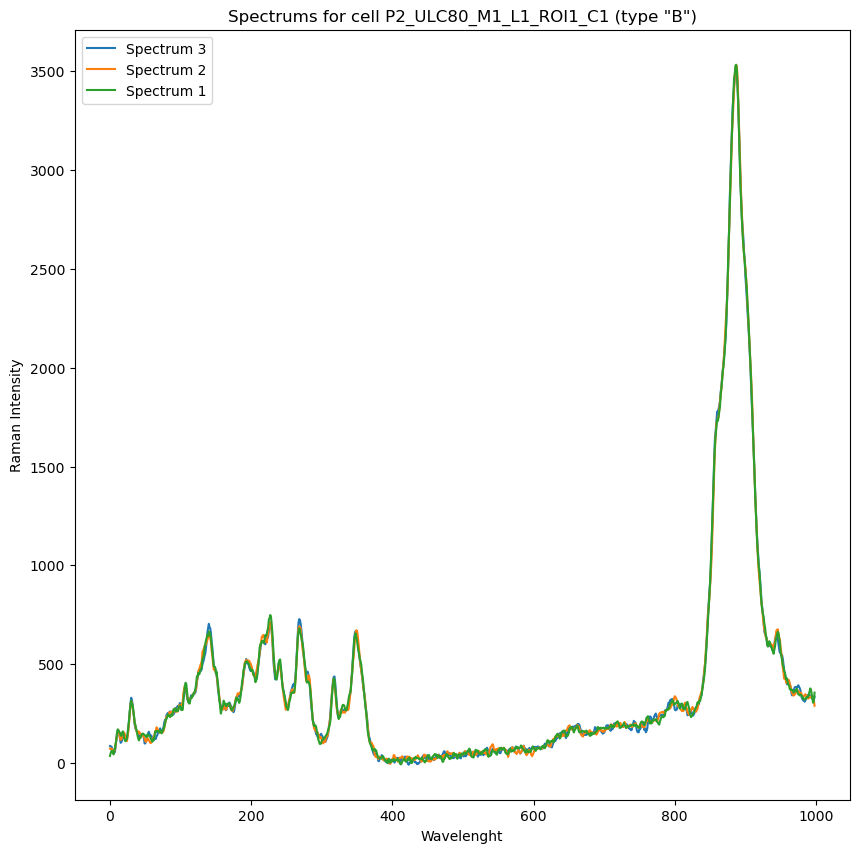

In [402]:
plt.figure(figsize=(10, 10))
plt.plot(list(range(999)), df_ind_sick.drop(columns=["spectre"]).iloc[0], label= f'Spectrum {int(df_ind_sick.iloc[0]["spectre"])}')
plt.plot(list(range(999)), df_ind_sick.drop(columns=["spectre"]).iloc[1], label= f'Spectrum {int(df_ind_sick.iloc[1]["spectre"])}')
plt.plot(list(range(999)), df_ind_sick.drop(columns=["spectre"]).iloc[2], label= f'Spectrum {int(df_ind_sick.iloc[2]["spectre"])}')

plt.legend()

plt.title(f'Spectrums for cell {cell_name_B} (type "B")')
plt.xlabel('Wavelenght')
plt.ylabel('Raman Intensity')

plt.show()

Here, we just take a look at the spectra. Visually, we do not see many differences between a sick patient and a healthy one. Moreover, the difference between the spectra is quite small, so we can average them.

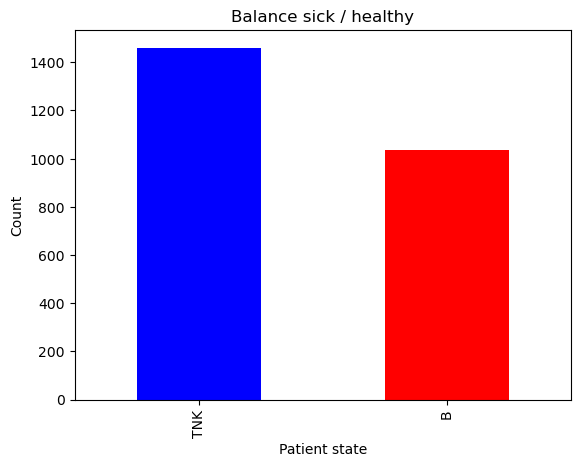

There are 0.5853365384615384 % TNK and 0.41466346153846156 % B


In [403]:
counts = df_by_cell["cell_type"].value_counts()
counts.plot(kind='bar', color=['blue', 'red'])

plt.xlabel('Patient state')
plt.ylabel('Count')
plt.title('Balance sick / healthy')
plt.show()
print(f"There are {counts['TNK']/(counts['B']+counts['TNK'])} % TNK and {counts['B']/(counts['B']+counts['TNK'])} % B")

There is not a big class imbalance.

# Machine learning

In [404]:
df_cell_name_type = df_by_cell[["cell_name", "cell_type"]].reset_index(drop=True)
df_mean_spectrum = df_spectrum.groupby("cell_name").mean().reset_index().drop(columns = ["cell_name", "spectre"])
df_model = pd.concat([df_cell_name_type, df_mean_spectrum], axis = 1)

shuffled_index = df_model.sample(frac=1, random_state=random_state).index

df_model = df_model.loc[shuffled_index].reset_index(drop=True)
df_model

,cell_name,cell_type,lambda_1,lambda_2,lambda_3,lambda_4,lambda_5,lambda_6,lambda_7,lambda_8,...,lambda_990,lambda_991,lambda_992,lambda_993,lambda_994,lambda_995,lambda_996,lambda_997,lambda_998,lambda_999
0,P2_ULC88_M1_L1_ROI1_C47,B,38.233357,41.286745,48.951032,52.682156,59.054108,50.303378,70.943727,81.689879,...,299.686652,302.382919,308.683711,301.922609,301.310254,298.799243,306.597144,304.011046,296.283105,274.299026
1,P2_ULC142_M1_L1_ROI1_C36,B,76.987456,74.114356,72.678891,73.098914,74.454024,69.922990,75.590055,80.956594,...,360.313724,351.995000,355.583337,355.759955,358.268661,360.026741,363.361187,366.079135,364.362643,362.900342
2,P1_ULC147_M1_L2_ROI2_C45,TNK,62.189976,60.581504,57.623723,56.955100,60.380394,55.333359,64.724956,76.534337,...,341.891502,331.454359,342.674734,342.774824,347.841991,350.549993,352.326499,347.644734,350.765385,359.416469
3,P2_ULC93_M1_L1_ROI1_C46,B,71.398012,77.831704,73.945711,64.905163,55.705337,60.392025,57.102235,68.204516,...,320.749006,326.529471,321.562435,321.426282,321.221104,322.222707,326.996639,320.502306,317.696204,301.949552
4,P1_ULC91_M1_L1_ROI1_C20,TNK,74.826888,68.899705,64.545611,66.814393,71.581012,60.287014,76.975935,84.782634,...,280.099003,274.647401,280.172229,274.590558,273.493836,268.506868,267.096165,263.473884,267.613167,281.535495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,P2_ULC129_M1_L1_ROI1_C11,B,53.036274,46.467964,44.653859,48.543400,56.222448,49.236594,55.582295,63.316394,...,349.156241,340.584767,355.658701,352.208947,354.910020,354.873345,357.671568,359.918793,360.279992,364.485466
2492,P1_ULC151_M1_L2_ROI1_C3,TNK,52.151293,54.131568,55.607453,57.154241,61.274017,56.606828,63.914156,73.216897,...,347.088739,343.946846,350.552150,353.544561,362.713996,367.126326,373.061358,370.721732,362.989115,349.585999
2493,P1_ULC86_M1_L1_ROI1_C26,TNK,93.883348,91.661338,89.873670,86.853648,84.516851,95.073417,99.027085,113.010318,...,341.114536,351.585573,346.522870,350.228610,346.654365,344.673484,342.513894,345.561458,344.835176,338.524775
2494,P1_ULC91_M1_L1_ROI2_C11,TNK,69.845895,78.488247,78.051102,78.781427,77.800342,85.835040,84.543556,89.114183,...,330.430512,340.953849,339.613843,341.393256,333.422545,335.927018,330.771197,326.711776,329.621058,337.722610


In [405]:
X = df_model.loc[:, "lambda_1":"lambda_999"]
y = np.where(df_model["cell_type"] == "B", 1, 0)

X.shape, y.shape

((2496, 999), (2496,))

In [406]:
standardizer = StandardScaler()
standardizer.fit(X)
X = pd.DataFrame(data = standardizer.transform(X.astype(float)), columns = X.columns)
X

,lambda_1,lambda_2,lambda_3,lambda_4,lambda_5,lambda_6,lambda_7,lambda_8,lambda_9,lambda_10,...,lambda_990,lambda_991,lambda_992,lambda_993,lambda_994,lambda_995,lambda_996,lambda_997,lambda_998,lambda_999
0,-1.449302,-1.322173,-0.724332,-0.582975,-0.376891,-0.459663,0.398829,0.478960,0.976147,0.686885,...,-1.141723,-0.849622,-0.790953,-0.972073,-1.054286,-1.140973,-0.989752,-0.996454,-1.227576,-1.737318
1,1.104988,0.929496,0.808977,0.865330,0.919659,0.827421,0.739259,0.423421,0.627272,0.827357,...,0.981442,0.879902,0.872651,0.905111,0.905467,0.884329,0.887899,0.932412,0.855182,0.691866
2,0.129684,0.001268,-0.163897,-0.279865,-0.265228,-0.129686,-0.056813,0.088480,1.027611,0.924923,...,0.336294,0.163836,0.414762,0.452349,0.546719,0.570854,0.522892,0.359533,0.439201,0.596348
3,0.736587,1.184471,0.890840,0.284089,-0.658831,0.202172,-0.615320,-0.542421,0.129411,0.316968,...,-0.404118,-0.007850,-0.334124,-0.292025,-0.369218,-0.366164,-0.314974,-0.483961,-0.572485,-0.979223
4,0.962585,0.571819,0.283399,0.419525,0.677774,0.195283,0.840801,0.713206,0.743733,1.108609,...,-1.827684,-1.816508,-1.802300,-1.925078,-2.011358,-2.142993,-2.296373,-2.256211,-2.104675,-1.538915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,-0.473639,-0.966790,-1.002018,-0.876566,-0.615294,-0.529646,-0.726684,-0.912647,-1.735066,-1.947536,...,0.590706,0.482131,0.875324,0.781295,0.789907,0.713864,0.699697,0.740969,0.730281,0.735325
2492,-0.531968,-0.441138,-0.294190,-0.265738,-0.189992,-0.046144,-0.116219,-0.162783,-0.163204,-0.041784,...,0.518302,0.599336,0.694187,0.827865,1.058417,1.119171,1.208763,1.076688,0.813162,0.326826
2493,2.218600,2.133056,1.920114,1.841050,1.766869,2.477336,2.456460,2.851170,2.041519,0.768788,...,0.309085,0.865629,0.551262,0.712246,0.505857,0.376469,0.198309,0.294792,0.257778,0.023560
2494,0.634287,1.229504,1.156133,1.268430,1.201392,1.871281,1.395271,1.041277,0.687556,0.279376,...,-0.065071,0.494997,0.306188,0.404177,0.050593,0.087151,-0.190119,-0.290992,-0.207668,0.001567


In [407]:
train_size = 0.8
test_size = 1 - train_size

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [409]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1996, 999) (1996,)
Test set: (500, 999) (500,)


In [410]:
resume_table = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'Recall', 'Precision', 'F-Score'])

In [411]:
def get_metrics(algorithm, y_pred, y_true):
    ''' Gives some metrics for the chosen model
    '''
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f_score = f1_score(y_true, y_pred)

    return algorithm, accuracy, recall, precision, f_score

## Logitic Regression with Lasso penalization

### Classic Lasso penalization

In [412]:
# param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
# grid = GridSearchCV(LogisticRegression(penalty='l1', solver='saga', max_iter=1000, random_state=random_state), param_grid, cv=5)

# grid.fit(X_train, y_train)
# best_C = grid.best_params_['C']

I did a cross-validation and the best parameter turns out to be C = 1. Each cross-validation was commented on after it had been run once, as it takes a long time to run.

In [413]:
log_reg = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, C = 1, random_state=random_state)

log_reg.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000, penalty='l1', random_state=42,
                   solver='saga')

In [414]:
non_zero_variables = X.columns[log_reg.coef_[0] != 0]
len(non_zero_variables)

659

In [415]:
y_prob = log_reg.predict_proba(X_test)[:, 1]
y_pred = (y_prob > 0.5).astype(int)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [416]:
confusion_matrix = np.zeros((2, 2))
for true_label, binary_prediction in zip(y_test, y_pred):
            confusion_matrix[true_label, binary_prediction] += 1

confusion_matrix

array([[250.,  47.],
       [ 50., 153.]])

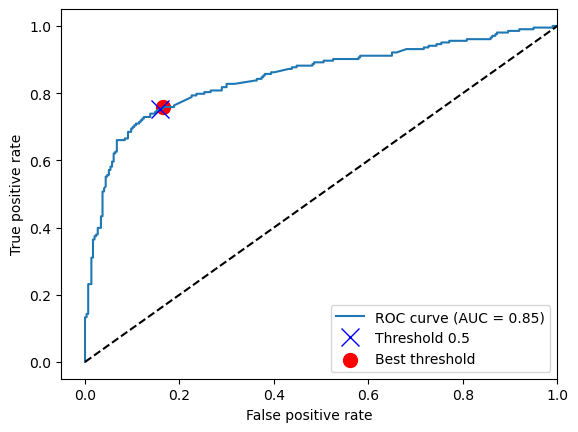

In [417]:
auc_roc = roc_auc_score(y_test, y_prob)

true_positive = confusion_matrix[1, 1]
false_positive = confusion_matrix[0, 1]
true_negative = confusion_matrix[0, 0]
false_negative = confusion_matrix[1, 0]

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

distances = np.sqrt((fpr - 0) ** 2 + (tpr - 1) ** 2)
index = np.argmin(distances)
optimal_threshold = thresholds[index]

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_roc)

plt.plot(1-specificity, sensitivity, 'x', label='Threshold 0.5', markersize=13, color = "blue")

plt.scatter(fpr[index], tpr[index], c='red', marker='o', s=100, label='Best threshold')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

In [418]:
optimal_threshold

0.4796817707080896

In [419]:
y_pred = (y_prob > optimal_threshold).astype(int)

In [420]:
algorithm, accuracy, recall, precision, f_score = get_metrics('LogReg', y_pred, y_test)
resume_table = resume_table.append({'Algorithm': algorithm, 'Accuracy': round(accuracy,5), 'Recall': round(recall,5), 'Precision':round(precision,5), 'F-Score':round(f_score,5)}, ignore_index=True)
resume_table

,Algorithm,Accuracy,Recall,Precision,F-Score
0,LogReg,0.802,0.75369,0.75743,0.75556


### Repeated Lasso penalization

We can also do this as follows: <br>
We run several logistic regressions with a lasso penalty, and keep only those parameters whose coefficient is non-zero a certain number of times (by determining a threshold). Then, we run a final model training, only with the retained variables and without penalization. This reduces the support for our model, making it more interpretable, and by removing the penalty we limit the model less.

In [421]:
threshold_features = 100

In [422]:
# dict_variables = {}
# for i in tqdm(range(100)):
#     log_reg_repeated = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, C = 1, random_state = random_state + i + 1)
#     log_reg_repeated.fit(X_train, y_train)

#     dict_variables[i] = list(X.columns[log_reg_repeated.coef_[0] != 0])

This code takes too long. It is better to load the following json file:

In [423]:
with open("dict_features.json", "r") as fichier_json:
    dict_variables = json.load(fichier_json)

In [424]:
occurrences = {}
for key in dict_variables:
    variables_list = dict_variables[key]
    for variable in variables_list:
        if str(variable) in occurrences:
            occurrences[variable] += 1
        else:
            occurrences[variable] = 1

frequent_features = [variable for variable, occurrence in occurrences.items() if occurrence >= threshold_features]

In [425]:
len(frequent_features)

648

In [426]:
X_reduced = X[frequent_features]
X_train_reduced, X_test_reduced, _, _ = train_test_split(X_reduced, y, test_size=test_size, random_state=random_state)

In [427]:
log_reg_not_penalized = LogisticRegression(penalty=None, solver='saga', max_iter=1000, C = 1, random_state=random_state)
log_reg_not_penalized.fit(X_train_reduced, y_train)

LogisticRegression(C=1, max_iter=1000, penalty=None, random_state=42,
                   solver='saga')

In [428]:
y_prob_reduced = log_reg_not_penalized.predict_proba(X_test_reduced)[:, 1]
y_pred_reduced = (y_prob_reduced > 0.5).astype(int)

In [429]:
confusion_matrix_reduced = np.zeros((2, 2))
for true_label, binary_prediction in zip(y_test, y_pred_reduced):
            confusion_matrix_reduced[true_label, binary_prediction] += 1

confusion_matrix_reduced

array([[248.,  49.],
       [ 52., 151.]])

In [430]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_reduced)

distances = np.sqrt((fpr - 0) ** 2 + (tpr - 1) ** 2)
index = np.argmin(distances)
optimal_threshold = thresholds[index]

In [431]:
y_pred_reduced = (y_prob_reduced > optimal_threshold).astype(int)

In [432]:
algorithm, accuracy, recall, precision, f_score = get_metrics('LogReg_no_pen', y_pred_reduced, y_test)
resume_table = resume_table.append({'Algorithm': algorithm, 'Accuracy': round(accuracy,5), 'Recall': round(recall,5), 'Precision':round(precision,5), 'F-Score':round(f_score,5)}, ignore_index=True)
resume_table

,Algorithm,Accuracy,Recall,Precision,F-Score
0,LogReg,0.802,0.75369,0.75743,0.75556
1,LogReg_no_pen,0.798,0.73892,0.75758,0.74813


## XGBoost

In [433]:
# param_grid = {
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
# }

# mod_xgb = xgb.XGBClassifier(seed = random_state)

# grid_search = GridSearchCV(estimator=mod_xgb, param_grid=param_grid, cv=5, n_jobs=-1)

# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# print("Best hyper-parameters:", best_params)

We have :<br>
Best hyper-parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}

In [434]:
mod_xgb = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7, n_estimators = 300, seed = random_state)
mod_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [435]:
y_pred = mod_xgb.predict(X_test)

In [436]:
algorithm, accuracy, recall, precision, f_score = get_metrics('XGBoost', y_pred, y_test)
resume_table = resume_table.append({'Algorithm': algorithm, 'Accuracy': round(accuracy,5), 'Recall': round(recall,5), 'Precision':round(precision,5), 'F-Score':round(f_score,5)}, ignore_index=True)
resume_table

,Algorithm,Accuracy,Recall,Precision,F-Score
0,LogReg,0.802,0.75369,0.75743,0.75556
1,LogReg_no_pen,0.798,0.73892,0.75758,0.74813
2,XGBoost,0.828,0.75862,0.80628,0.78173


## SVM

In [437]:
# param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
# svm = SVC(kernel='rbf')

# grid = GridSearchCV(svm, param_grid, cv=5)
# grid.fit(X_train, y_train)

# print("Best parameters : {}".format(grid.best_params_))
# print("Best performance : {:.2f}".format(grid.best_score_))

We have :<br>
Best hyper-parameters: {'C': 1, 'gamma': 0.001}

In [438]:
svm = SVC(kernel='rbf', C=1, gamma=0.001)

svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [439]:
algorithm, accuracy, recall, precision, f_score = get_metrics('SVM', y_pred, y_test)
resume_table = resume_table.append({'Algorithm': algorithm, 'Accuracy': round(accuracy,5), 'Recall': round(recall,5), 'Precision':round(precision,5), 'F-Score':round(f_score,5)}, ignore_index=True)
resume_table

,Algorithm,Accuracy,Recall,Precision,F-Score
0,LogReg,0.802,0.75369,0.75743,0.75556
1,LogReg_no_pen,0.798,0.73892,0.75758,0.74813
2,XGBoost,0.828,0.75862,0.80628,0.78173
3,SVM,0.838,0.76847,0.82105,0.79389


## Neural network

In [476]:
fit_verbosity = 1

In [477]:
def get_model_v1(learning_rate=0.001, neurons_layer1=64, neurons_layer2=128, dropout_rate = None):
  
  model = keras.models.Sequential()
  model.add(keras.layers.Input(X_train.values[0].shape, name="InputLayer"))

  model.add(keras.layers.Dense(neurons_layer1, activation='relu'))
  if dropout_rate:
    model.add(keras.layers.Dropout(dropout_rate))

  model.add(keras.layers.Dense(neurons_layer2, activation='relu'))
  if dropout_rate:
    model.add(keras.layers.Dropout(dropout_rate))

  model.add(keras.layers.Dense(neurons_layer1, activation='relu'))
  if dropout_rate:
    model.add(keras.layers.Dropout(dropout_rate))

  model.add(keras.layers.Dense(2, activation='softmax'))
  
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

In [442]:
# param_grid = {
#     'epochs': [6, 12, 18],
#     'learning_rate': [0.001, 0.01, 0.1],
#     'neurons_layer1': [32, 64, 128],
#     'neurons_layer2': [64, 128, 256],
#     'batch_size': [32, 64, 128]
# }

In [443]:
# X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=random_state)

In [444]:
# list_accuracy = []
# best_parameters = {}

# for epochs in param_grid["epochs"]:
#     for lr in param_grid["learning_rate"]:
#         for nl1 in param_grid["neurons_layer1"]:
#             for nl2 in param_grid["neurons_layer2"]:
#                 for bs in param_grid["batch_size"]:

#                     model=get_model_v1(learning_rate=lr, neurons_layer1=nl1, neurons_layer2=nl2)
#                     history = model.fit(X_train2,
#                                         y_train2,
#                                         epochs          = epochs,
#                                         batch_size      = bs,
#                                         verbose         = fit_verbosity,
#                                         validation_data = (X_val, y_val))

#                     list_accuracy.append(model.evaluate(X_val, y_val, verbose=0)[1])
#                     if max(list_accuracy) == list_accuracy[-1]:
#                         best_parameters = {
#                             'epochs': epochs,
#                             'learning_rate': lr,
#                             'neurons_layer1': nl1,
#                             'neurons_layer2': nl2,
#                             'batch_size': bs
#                         }

# print("Best parameters :\n", best_parameters)

We get: <br>
Best parameters :
 {'epochs': 18, 'learning_rate': 0.001, 'neurons_layer1': 32, 'neurons_layer2': 128, 'batch_size': 32}

In [483]:
model=get_model_v1(learning_rate=0.001, neurons_layer1=32, neurons_layer2=128)
history = model.fit(X_train,
                    y_train,
                    epochs          = 18,
                    batch_size      = 32,
                    verbose         = fit_verbosity,
                    validation_data = (X_test, y_test))

Epoch 1/18
63/63 [==============================] - 1s 3ms/step - loss: 0.5639 - accuracy: 0.7074 - val_loss: 0.5048 - val_accuracy: 0.7740
Epoch 2/18
63/63 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.8156 - val_loss: 0.4199 - val_accuracy: 0.8280
Epoch 3/18
63/63 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.8402 - val_loss: 0.4367 - val_accuracy: 0.8200
Epoch 4/18
63/63 [==============================] - 0s 2ms/step - loss: 0.3293 - accuracy: 0.8662 - val_loss: 0.4004 - val_accuracy: 0.8420
Epoch 5/18
63/63 [==============================] - 0s 2ms/step - loss: 0.2792 - accuracy: 0.8898 - val_loss: 0.4317 - val_accuracy: 0.8300
Epoch 6/18
63/63 [==============================] - 0s 2ms/step - loss: 0.2536 - accuracy: 0.9013 - val_loss: 0.4273 - val_accuracy: 0.8480
Epoch 7/18
63/63 [==============================] - 0s 2ms/step - loss: 0.2252 - accuracy: 0.9173 - val_loss: 0.4202 - val_accuracy: 0.8540
Epoch 8/18
63/63 [==

In [484]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.5857188701629639
Test accuracy : 0.8619999885559082


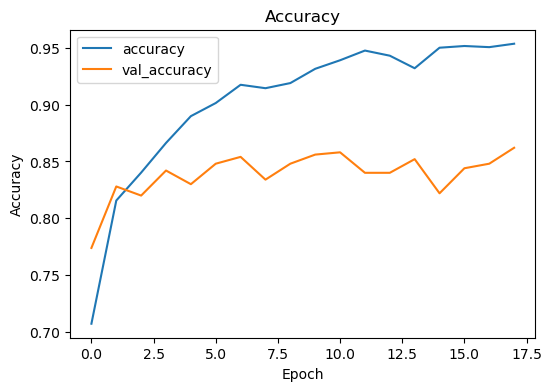

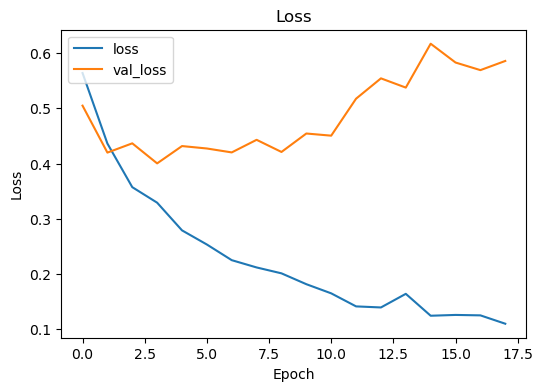

In [485]:
fidle.scrawler.history(history, figsize=(6,4))

There's a lot of overlearning. Test results are not bad, but accuracy is likely to be highly variable on new test samples.

In [494]:
model=get_model_v1(learning_rate=0.001, neurons_layer1=32, neurons_layer2=64, dropout_rate=0.3)
history = model.fit(X_train,
                    y_train,
                    epochs          = 12,
                    batch_size      = 32,
                    verbose         = fit_verbosity,
                    validation_data = (X_test, y_test))

Epoch 1/12
63/63 [==============================] - 1s 4ms/step - loss: 0.7043 - accuracy: 0.6027 - val_loss: 0.5687 - val_accuracy: 0.6900
Epoch 2/12
63/63 [==============================] - 1s 9ms/step - loss: 0.5976 - accuracy: 0.6779 - val_loss: 0.5390 - val_accuracy: 0.7580
Epoch 3/12
63/63 [==============================] - 0s 3ms/step - loss: 0.5555 - accuracy: 0.7214 - val_loss: 0.4827 - val_accuracy: 0.7880
Epoch 4/12
63/63 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.7390 - val_loss: 0.4424 - val_accuracy: 0.8220
Epoch 5/12
63/63 [==============================] - 0s 2ms/step - loss: 0.4873 - accuracy: 0.7896 - val_loss: 0.4237 - val_accuracy: 0.8300
Epoch 6/12
63/63 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.7996 - val_loss: 0.4212 - val_accuracy: 0.8200
Epoch 7/12
63/63 [==============================] - 0s 2ms/step - loss: 0.4293 - accuracy: 0.8116 - val_loss: 0.4115 - val_accuracy: 0.8160
Epoch 8/12
63/63 [==

In [495]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.3988921046257019
Test accuracy : 0.8399999737739563


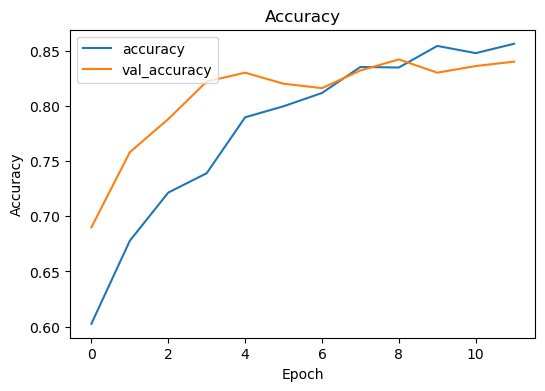

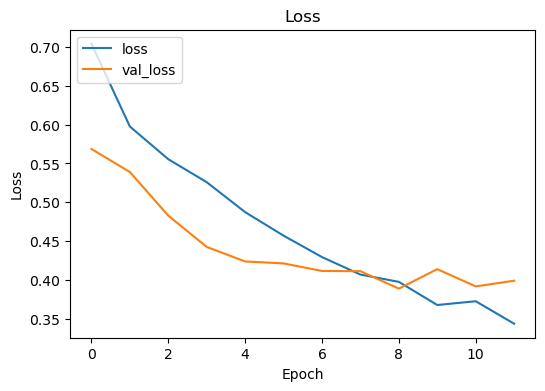

In [496]:
fidle.scrawler.history(history, figsize=(6,4))

In [497]:
y_pred = np.where(model.predict(X_test, verbose=0)[:, 0] > model.predict(X_test, verbose=0)[:, 1], 0, 1)

In [498]:
algorithm, accuracy, recall, precision, f_score = get_metrics('DNN', y_pred, y_test)
resume_table = resume_table.append({'Algorithm': algorithm, 'Accuracy': round(accuracy,5), 'Recall': round(recall,5), 'Precision':round(precision,5), 'F-Score':round(f_score,5)}, ignore_index=True)
resume_table

,Algorithm,Accuracy,Recall,Precision,F-Score
0,LogReg,0.802,0.75369,0.75743,0.75556
1,LogReg_no_pen,0.798,0.73892,0.75758,0.74813
2,XGBoost,0.828,0.75862,0.80628,0.78173
3,SVM,0.838,0.76847,0.82105,0.79389
4,DNN,0.840,0.75369,0.83607,0.79275


If we look at the accuracy obtained in testing, neural networks offer better results. However, it remains a model that loses a lot of accuracy during training and over-learns a lot. I therefore prefer to use the SVM model on new predictions.

# To go further...

## Test on patients

We can create a dataframe just for a single patient, and predict the nature (B or TNK) of each of his cells. In the end, this will enable us to predict his proportion of B cells, and compare it with the actual proportion. This test is a little biased, as the patients were all used to train the model, but it gives an idea of what our model can do. In addition, we can run the test on the individual we removed from the initial dataset (patient P1_ULC156).

In [590]:
ind = "P1_ULC156" #try also P1_ULC156 (the strange one), P1_ULC137, P1_ULC100 (healthy), P2_ULC146, P2_ULC99, P2_ULC81 (sick)

In [591]:
df = pd.read_csv(INPUT_DIR, sep = ";").groupby(['patient_name', 'cell_name', 'cell_type']).mean().reset_index()
df = df[df["patient_name"] == ind]

final_y = np.where(df["cell_type"] == "B", 1, 0)
final_X = df.drop(columns = ["patient_name", "cell_name", "cell_type", "spectre"])
final_X = pd.DataFrame(data = standardizer.transform(final_X.astype(float)), columns = final_X.columns)

In [592]:
# y_pred = np.where(model.predict(final_X, verbose=0)[:, 0] > model.predict(final_X, verbose=0)[:, 1], 0, 1)

In [593]:
y_pred = svm.predict(final_X)

In [594]:
print(f"True proportion of B cells for patient {ind} ({['sick', 'healthy'][ind[:2] == 'P1']}): ", (np.sum(final_y)/len(final_X))*100, " %")
print(f"Predicted proportion of B cells for patient {ind}: ", (np.sum(y_pred)/len(final_X))*100, " %")

True proportion of B cells for patient P1_ULC156 (healthy):  58.333333333333336  %
Predicted proportion of B cells for patient P1_ULC156:  54.166666666666664  %


## Calculating a confidence interval for new patients

In [598]:
accuracy = resume_table[resume_table["Algorithm"] == "SVM"]["Accuracy"].values[0]
phat = (np.sum(y_pred)/len(final_X))
sigma = math.sqrt((accuracy*(1-accuracy))/len(final_X))
IC_95 = [max(0, phat - 1.96 * sigma), min(phat + 1.96 * sigma, 1)]
print(f"95% confidence interval for predicted B cells proportion (patient {ind}): ", IC_95)

95% confidence interval for predicted B cells proportion (patient P1_ULC156):  [0.45655887148902147, 0.6267744618443118]
